**КТ2 - Выполнил Кирилл Запорожченко, ФЗ-11**

### Object Detection

In [9]:
import numpy as np
import os
from PIL import Image, ImageDraw
from transformers import AutoImageProcessor
import albumentations
import numpy as np
import torch
from transformers import AutoModelForObjectDetection
from transformers import TrainingArguments

Загружаем датасет

In [10]:
import os
import json
from PIL import Image

# Путь к папке с изображениями
image_dir = 'C:\\Users\\Kreal\\Documents\\VUZ\\psuObjectDecection\\KT2\\16. Market.v6i.coco\\train'

# Загрузка аннотаций
with open(os.path.join(image_dir, '_annotations.coco.json')) as f:
    data = json.load(f)

# Создание словаря для хранения изображений и их аннотаций
dataset = []

# Обход по всем изображениям
for image_info in data['images']:
    # Загрузка изображения с помощью PIL
    image = Image.open(os.path.join(image_dir, image_info['file_name']))
    
    # Находим соответствующие аннотации для этого изображения
    image_annotations = [a for a in data['annotations'] if a['image_id'] == image_info['id']]
    
    # Собираем информацию об объектах на изображении
    objects = {
        'id': [a['id'] for a in image_annotations],
        'area': [a['area'] for a in image_annotations],
        'bbox': [a['bbox'] for a in image_annotations],
        'category': [a['category_id'] for a in image_annotations]
    }
    
    # Добавляем словарь с информацией об изображении в датасет
    dataset.append({
        'image_id': image_info['id'],
        'image': image,
        'width': image_info['width'],
        'height': image_info['height'],
        'objects': objects
    })


In [13]:
dataset[0]

{'image_id': 0,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=416x416>,
 'width': 416,
 'height': 416,
 'objects': {'id': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  'area': [1304.469,
   1337.917,
   1009.599,
   1036.885,
   1235.813,
   1407.453,
   1408.333,
   1237.573,
   1014,
   1197.083,
   1160,
   785.333,
   756,
   1176,
   720],
  'bbox': [[115, 73, 30.875, 42.25],
   [147, 76, 30.875, 43.333],
   [115, 124, 30.063, 33.583],
   [145, 126, 30.875, 33.583],
   [87, 70, 29.25, 42.25],
   [23, 62, 31.688, 44.417],
   [54, 66, 32.5, 43.333],
   [21, 107, 30.063, 41.167],
   [54, 119, 29.25, 34.667],
   [83, 118, 32.5, 36.833],
   [210, 93, 43.5, 26.667],
   [179, 73, 31, 25.333],
   [178, 97, 31.5, 24],
   [208, 116, 42, 28],
   [177, 119, 30, 24]],
  'category': [51, 51, 51, 51, 52, 50, 50, 50, 50, 50, 38, 38, 38, 38, 38]}}

Отрисуем для примера

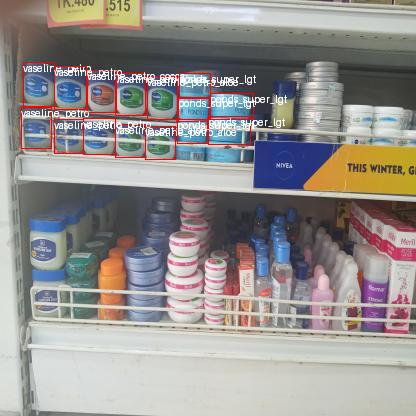

In [12]:
from IPython.display import display

# Первый элемент в датасете
data_item = dataset[0]

# Изображение и аннотации
image = data_item["image"]
annotations = data_item["objects"]

# Создаем объект для рисования на изображении
draw = ImageDraw.Draw(image)

# Получаем категории из данных
categories = [cat['name'] for cat in data['categories']]

# Создаем словари для преобразования между ID и именами категорий
id2label = {cat['id']: cat['name'] for cat in data['categories']}
label2id = {v: k for k, v in id2label.items()}

# Рисуем bounding boxes для каждого объекта на изображении
for i in range(len(annotations["id"])):
    box = annotations["bbox"][i]
    class_idx = annotations["category"][i]
    x, y, w, h = tuple(box)
    if max(box) > 1.0:
        x1, y1 = int(x), int(y)
        x2, y2 = int(x + w), int(y + h)
    else:
        x1 = int(x * image.width)
        y1 = int(y * image.height)
        x2 = int((x + w) * image.width)
        y2 = int((y + h) * image.height)
    draw.rectangle((x1, y1, x2, y2), outline="red", width=1)
    draw.text((x1, y1), id2label[class_idx], fill="white")

# Показываем изображение
display(image)